Notebook used to manually tag the centerline position of each captured frame

In [29]:
import numpy as np

import ipywidgets as widgets
from ipywidgets import HBox
from IPython.display import display
from ipywidgets import Button, Layout
from ipywidgets import IntSlider
from ipywidgets import HBox, VBox

IntSlider(description='A too long description')



import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

import time

In [30]:
# load the captured images
images = np.load('trackImagesTemp.npy')
images.shape

(400, 224, 224, 3)

In [31]:
# delete images 0 to 20
excLst = list(range(0, 20))
images = np.delete(images, excLst, axis=0)
images.shape

(380, 224, 224, 3)

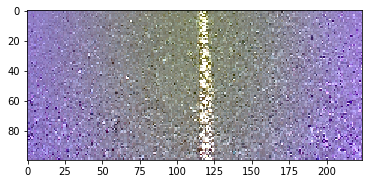

In [32]:
# plot the first captrured image
imgplot = plt.imshow(images[0][100:200])
#imgplot = plt.imshow(images[0])

In [33]:
# convert the firest image to binary for the widget display
is_success, im_buf_arr = cv2.imencode(".jpg", images[0][100:200])
#is_success, im_buf_arr = cv2.imencode(".jpg", images[0])
byte_im = im_buf_arr.tobytes()

In [34]:
# variable to store the tagged positions of the centerline
trackPositions = []

Create widgets to hepl in the process of tagging each captured image

In [35]:
nextButton = widgets.Button(
                    description='Next',
                    disabled=False,
                    button_style='', # 'success', 'info', 'warning', 'danger' or ''
                    tooltip='Next',
                    icon='check' # (FontAwesome names without the `fa-` prefix)
                )

# create the image display widget
imgDisp = widgets.Image(
            value=byte_im,
            format='png',
            width=300,
            height=400,
        )

# create the float slider that will be used to tag the position of the centerline
track = widgets.FloatSlider(
    value=7.5,
    min=0,
    max=225,
    step=0.1,
    description='',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    layout=Layout(width='380px')
)

# create the output widget for text message
output = widgets.Output()
output2 = widgets.Output()

d = HBox([imgDisp, output, nextButton])

# display to the screen the widgets
display(d, track, output2)

# create a class to store the current image index
class CurImage():
    
    def __init__(self):
        
        self.pos = 0
        
    def update(self):
        
        self.pos = self.pos + 1
        
# create an instance
curImage = CurImage()

# create a class to store the tagged centerline poistion
class TrackPos():
    
    def __init__(self):
        
        self.pos = []
        
    def update(self,pos):
        
        self.pos.append(pos)
        
        
trackPositions = TrackPos()

# function to be executed for each next button press.
def on_button_clicked(b):
    
    # get the current image ,crop and convert to binary 
    is_success, im_buf_arr = cv2.imencode(".jpg", images[curImage.pos][100:200])
    #is_success, im_buf_arr = cv2.imencode(".jpg", images[curImage.pos])
    byte_im = im_buf_arr.tobytes()

    # set the image widget to the current image
    imgDisp.value = byte_im

    # increment the position of the current image index
    curImage.update()

    # indicate which image is beeing tagged next
    with output :

        output.clear_output()
        print(curImage.pos)


    trackPositions.update(track.value)

    # indicate the value of the tagged centerline position
    with output2:

        output2.clear_output()
        print(str(track.value))
        
        
# function to be executed when the value of the position slider is changed                  
def on_value_change(change):
    
    # get the value of the position slider
    sliderPos = int(change['new'])

    # get the new image and convert to binary
    is_success, im_buf_arr = cv2.imencode(".jpg", images[curImage.pos][100:200])
    #is_success, im_buf_arr = cv2.imencode(".jpg", images[curImage.pos])
    byte_im = im_buf_arr.tobytes()

    # set the image widget to the new image
    imgDisp.value = byte_im

    # increment the image index
    curImage.update()

    # indicate which image is beeing tagged next
    with output:

        output.clear_output()
        print(curImage.pos)

    trackPositions.update(sliderPos)
    
    # indicate the value of the tagged centerline position
    with output2:

        output2.clear_output()
        print(str(sliderPos))

    
nextButton.on_click(on_button_clicked)
track.observe(on_value_change, names='value')

FloatSlider(value=7.5, continuous_update=False, layout=Layout(width='380px'), max=225.0, readout_format='.1f')

Output()

In [36]:
# get the number of tags
len(trackPositions.pos)

380

In [37]:
# save the tagged centerline poistions
tracksArr = np.array(trackPositions.pos)
np.save('./trackPos_210624.npy', tracksArr)

In [38]:
# save the captured images
np.save('./trackTrainImages_210624.npy', images)